# 1. EDB Score 

In `data/DBData.csv`, you have the full "ease of doing business" dataset from the World Bank. Reformat it into the **Tidy Data** format, so one row is per-year-per-country

Result should look like:

![](EDB_unstack.png)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('data/DBData.csv')
df = df.drop(['Unnamed: 20', 'Indicator Code'], axis=1)
df = df.pivot_table(index = "Indicator Name", 
                      columns = "Country Name").T
df = df.reset_index()
df = df.rename(index={"Indicator Name":"Measure"}, columns={"level_0":"Year"})
df

Indicator Name,Year,Country Name,Dealing with construction permits (DB06-15 methodology) - Score,Dealing with construction permits (DB16-19 methodology) - Score,Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology),Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology) - Score,Dealing with construction permits: Cost (% of Warehouse value),Dealing with construction permits: Cost (% of Warehouse value) - Score,Dealing with construction permits: Liability and insurance regimes index (0-2) (DB16-19 methodology),Dealing with construction permits: Procedures (number),...,Trading across borders: Documents to export (number) (DB06-15 methodology),Trading across borders: Documents to export (number) (DB06-15 methodology) - Score,Trading across borders: Documents to import (number) (DB06-15 methodology),Trading across borders: Documents to import (number) (DB06-15 methodology) - Score,Trading across borders: Time to export (days) (DB06-15 methodology) - Score,Trading across borders: Time to export: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to export: Documentary compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import (days) (DB06-15 methodology) - Score,Trading across borders: Time to import: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import: Documentary compliance (hours) (DB16-19 methodology) - Score
0,2004,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2004,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2004,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2004,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2004,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,2019,Vietnam,NaN,79.05,12.0,80.00,0.7,96.54,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,66.04,71.01,NaN,80.29,68.62
3021,2019,West Bank and Gaza,NaN,56.15,12.0,80.00,14.4,28.24,0.0,20.0,...,NaN,NaN,NaN,NaN,NaN,96.86,57.99,NaN,98.21,81.45
3022,2019,"Yemen, Rep.",NaN,0.00,NaN,0.00,NaN,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,0.00,0.00
3023,2019,Zambia,NaN,71.65,10.0,66.67,2.6,86.92,0.0,10.0,...,NaN,NaN,NaN,NaN,NaN,25.16,43.79,NaN,57.35,70.29


# 2 GDP and ease of doing business

Using the additional data in `data/GDPpc.csv`, join the clean dataset in **1** to the GDP data.

**What are the 3 Ease of Doing Business variables most closely linked to GDP?**

Answer by giving their correlation ratio, and give a possible explanation and a data visualization

**hint:** trying to do `df.corr()` or `sns.pairplot()` on the whole dataset will crash most computers. Be smart about the number of columns you're testing at once.

In [18]:
gdp = pd.read_csv('data/GDPpc.csv')
gdp = gdp.drop(['Indicator Code', 'Indicator Name'], axis=1)
gdp = gdp.melt(id_vars=['Country Name', 'Country Code'], 
               var_name='Year', 
               value_name='GDP per capita')
gdp = gdp.dropna()
gdp.head(30)

,Country Name,Country Code,Year,GDP per capita
1,Afghanistan,AFG,1960,59.777327
11,Australia,AUS,1960,1807.349784
12,Austria,AUT,1960,935.460427
14,Burundi,BDI,1960,70.349079
15,Belgium,BEL,1960,1273.691659
16,Benin,BEN,1960,93.022509
17,Burkina Faso,BFA,1960,68.424749
18,Bangladesh,BGD,1960,88.691211
21,"Bahamas, The",BHS,1960,1550.324315
24,Belize,BLZ,1960,304.917107


In [21]:
merge_df = df.merge(gdp, on=['Country Name','Year'])
merge_df.Year = merge_df.Year.astype(int)
df_final = pd.DataFrame(merge_df.corrwith(merge_df['GDP per capita']))
df_final.sort_values(by=0,ascending=False).head(10) 
# Getting electricity:
# Resolving insolvency
# Global: Ease of doing business score 

,0
GDP per capita,1.000000
Getting electricity: Total duration and frequency of outages per customer a year (0-3) (DB16-19 methodology),0.646972
Resolving insolvency (DB04-14 methodology) - Score,0.644669
Resolving insolvency: Recovery rate (cents on the dollar),0.644232
Resolving insolvency: Recovery rate (cents on the dollar) - Score,0.644209
Global: Ease of doing business score (DB15 methodology),0.621080
Global: Ease of doing business score (DB10-14 methodology),0.615020
Global: Ease of doing business score (DB16 methodology),0.614590
Global: Ease of doing business score (DB17-19 methodology),0.605895
Registering property: Quality of land administration index (0-30) (DB17-19 methodology),0.580885


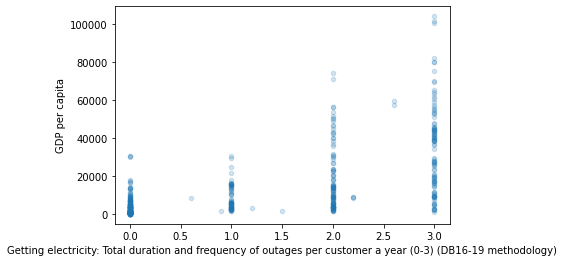

In [27]:
# Data visualizations:

import matplotlib.pyplot as plt

merge_df.plot(y='GDP per capita', x="Getting electricity: Total duration and frequency of outages per customer a year (0-3) (DB16-19 methodology)", kind='scatter', alpha = 0.2)
plt.show()

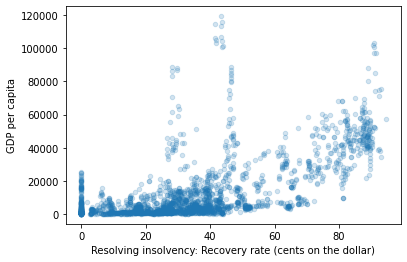

In [28]:
merge_df.plot(y='GDP per capita', x="Resolving insolvency: Recovery rate (cents on the dollar)", kind='scatter', alpha = 0.2)
plt.show()

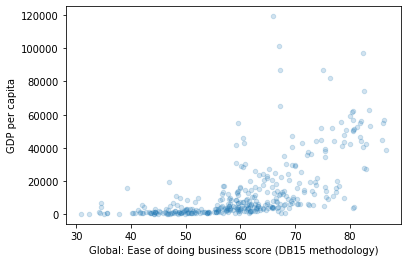

In [29]:
merge_df.plot(y='GDP per capita', x='Global: Ease of doing business score (DB15 methodology)', kind='scatter', alpha = .2)
plt.show()

# 3. Chocolate Nobel question

In this repository is the academic paper `chocolate_nobel.pdf`. 

Explain in 3 paragraphs why this paper's conclusions are bad statistics.

In [36]:
"""
The paper goes into vague details/points to discuss the correlation between chocolate and nobel prize winners. They provide a comparison of the nobel prize winners per 10 million population and chocolate consumption on an annual basis. The paper never provide a clear conclusion about whether or not the hypotheses are correct. We don't have a clear idea about the chcolate consumption by Nobel Laureates. 

The paper also lacks a large amount of data and information. They only considered a very small sample size of countries, this is not exactly statistically significant. The sources were also time restricted and did not provide a big enough image for the scope of chocolate consumption. Simply put, the paper is trying to suggest whether or not there is a correlation between chocolate consumption and cognitive function, use nobel laureates numbers in place due to lack of information. This is also bad statistics as it makes the assumption that nobel laureates per capita is a direct relation to cognitive function of a country.

Finally, the logic behind this analysis is that because flavanols found in chocolate appear to be effective in slowing down a reduction in cognitive function in individual rats, that it should make populations of people smarter. The logic here is unclear. Cognitive ability is not as simple as being 'smart'. The cognitive functions improved by flavanols have no clear relation to those which are necessary to win a Nobel Prize, and the author doesn't draw any kind of connection aside from that they both use some kind of cognitive ability.

"""

"\nThe paper goes into vague details/points to discuss the correlation between chocolate and nobel prize winners. They provide a comparison of the nobel prize winners per 10 million population and chocolate consumption on an annual basis. The paper never provide a clear conclusion about whether or not the hypotheses are correct. We don't have a clear idea about the chcolate consumption by Nobel Laureates. \n\nThe paper also lacks a large amount of data and information. They only considered a very small sample size of countries, this is not exactly statistically significant. The sources were also time restricted and did not provide a big enough image for the scope of chocolate consumption. Simply put, the paper is trying to suggest whether or not there is a correlation between chocolate consumption and cognitive function, use nobel laureates numbers in place due to lack of information. This is also bad statistics as it makes the assumption that nobel laureates per capita is a direct rel